# import

In [31]:
import pandas as pd
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# load

In [4]:
logger = init_logger()

In [5]:
with timer("load", logger):
    df_train = pd.read_csv("../input/train.csv")
    df_test = pd.read_csv("../input/test.csv")

2022/01/02 10:08:42 46 [INFO] [load] start.
2022/01/02 10:08:48 48 [INFO] [load] done in 5.339 seconds.


In [6]:
df_info(df_train)

,unique,missing,dtype,count,mean,std,min,25%,50%,75%,max
Id,4000000,0,int64,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Elevation,2525,0,int64,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Aspect,440,0,int64,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Slope,68,0,int64,4000000.0,1.509754e+01,8.546731e+00,-3.0,9.00,14.0,20.00,64.0
Horizontal_Distance_To_Hydrology,1636,0,int64,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Vertical_Distance_To_Hydrology,916,0,int64,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Horizontal_Distance_To_Roadways,7760,0,int64,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Hillshade_9am,301,0,int64,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,221,0,int64,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0
Hillshade_3pm,326,0,int64,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0


In [8]:
X_train = df_train.drop(["Id", "Cover_Type"], axis=1)
y_train = df_train["Cover_Type"]
X_test = df_test.drop(["Id"], axis=1)

# feature

In [34]:
continuous_columns = []
categorical_columns = []

for columns in X_train.columns:
    if X_train[columns].nunique() > 20:
        continuous_columns.append(columns)
    else:
        categorical_columns.append(columns)

print(len(continuous_columns), continuous_columns)
print(len(categorical_columns), categorical_columns)

10 ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
44 ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


## continuous

100%|███████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


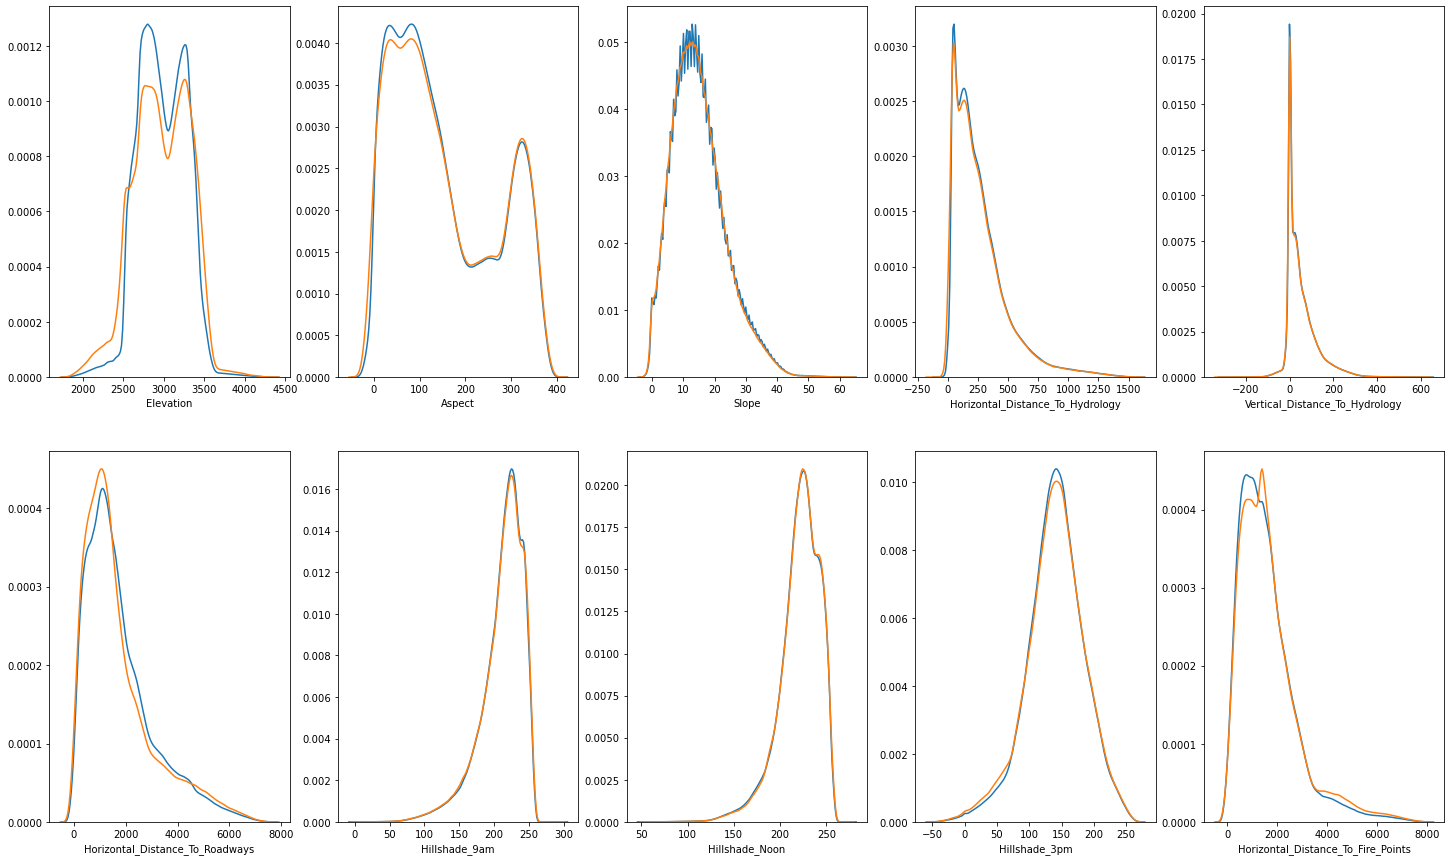

In [30]:
ncols = 5
nrows = (len(continuous_columns) - 1) // ncol + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 15))

for idx, column in tqdm(list(enumerate(continuous_columns))):
    i, j = divmod(idx, ncols)
    sns.kdeplot(x=df_train[column], ax=axes[i, j], label='Train data')
    sns.kdeplot(x=df_test[column], ax=axes[i, j], label='Test data')
    axes[i, j].set_ylabel('')

## categorical

100%|███████████████████████████████████████████| 44/44 [00:08<00:00,  4.89it/s]


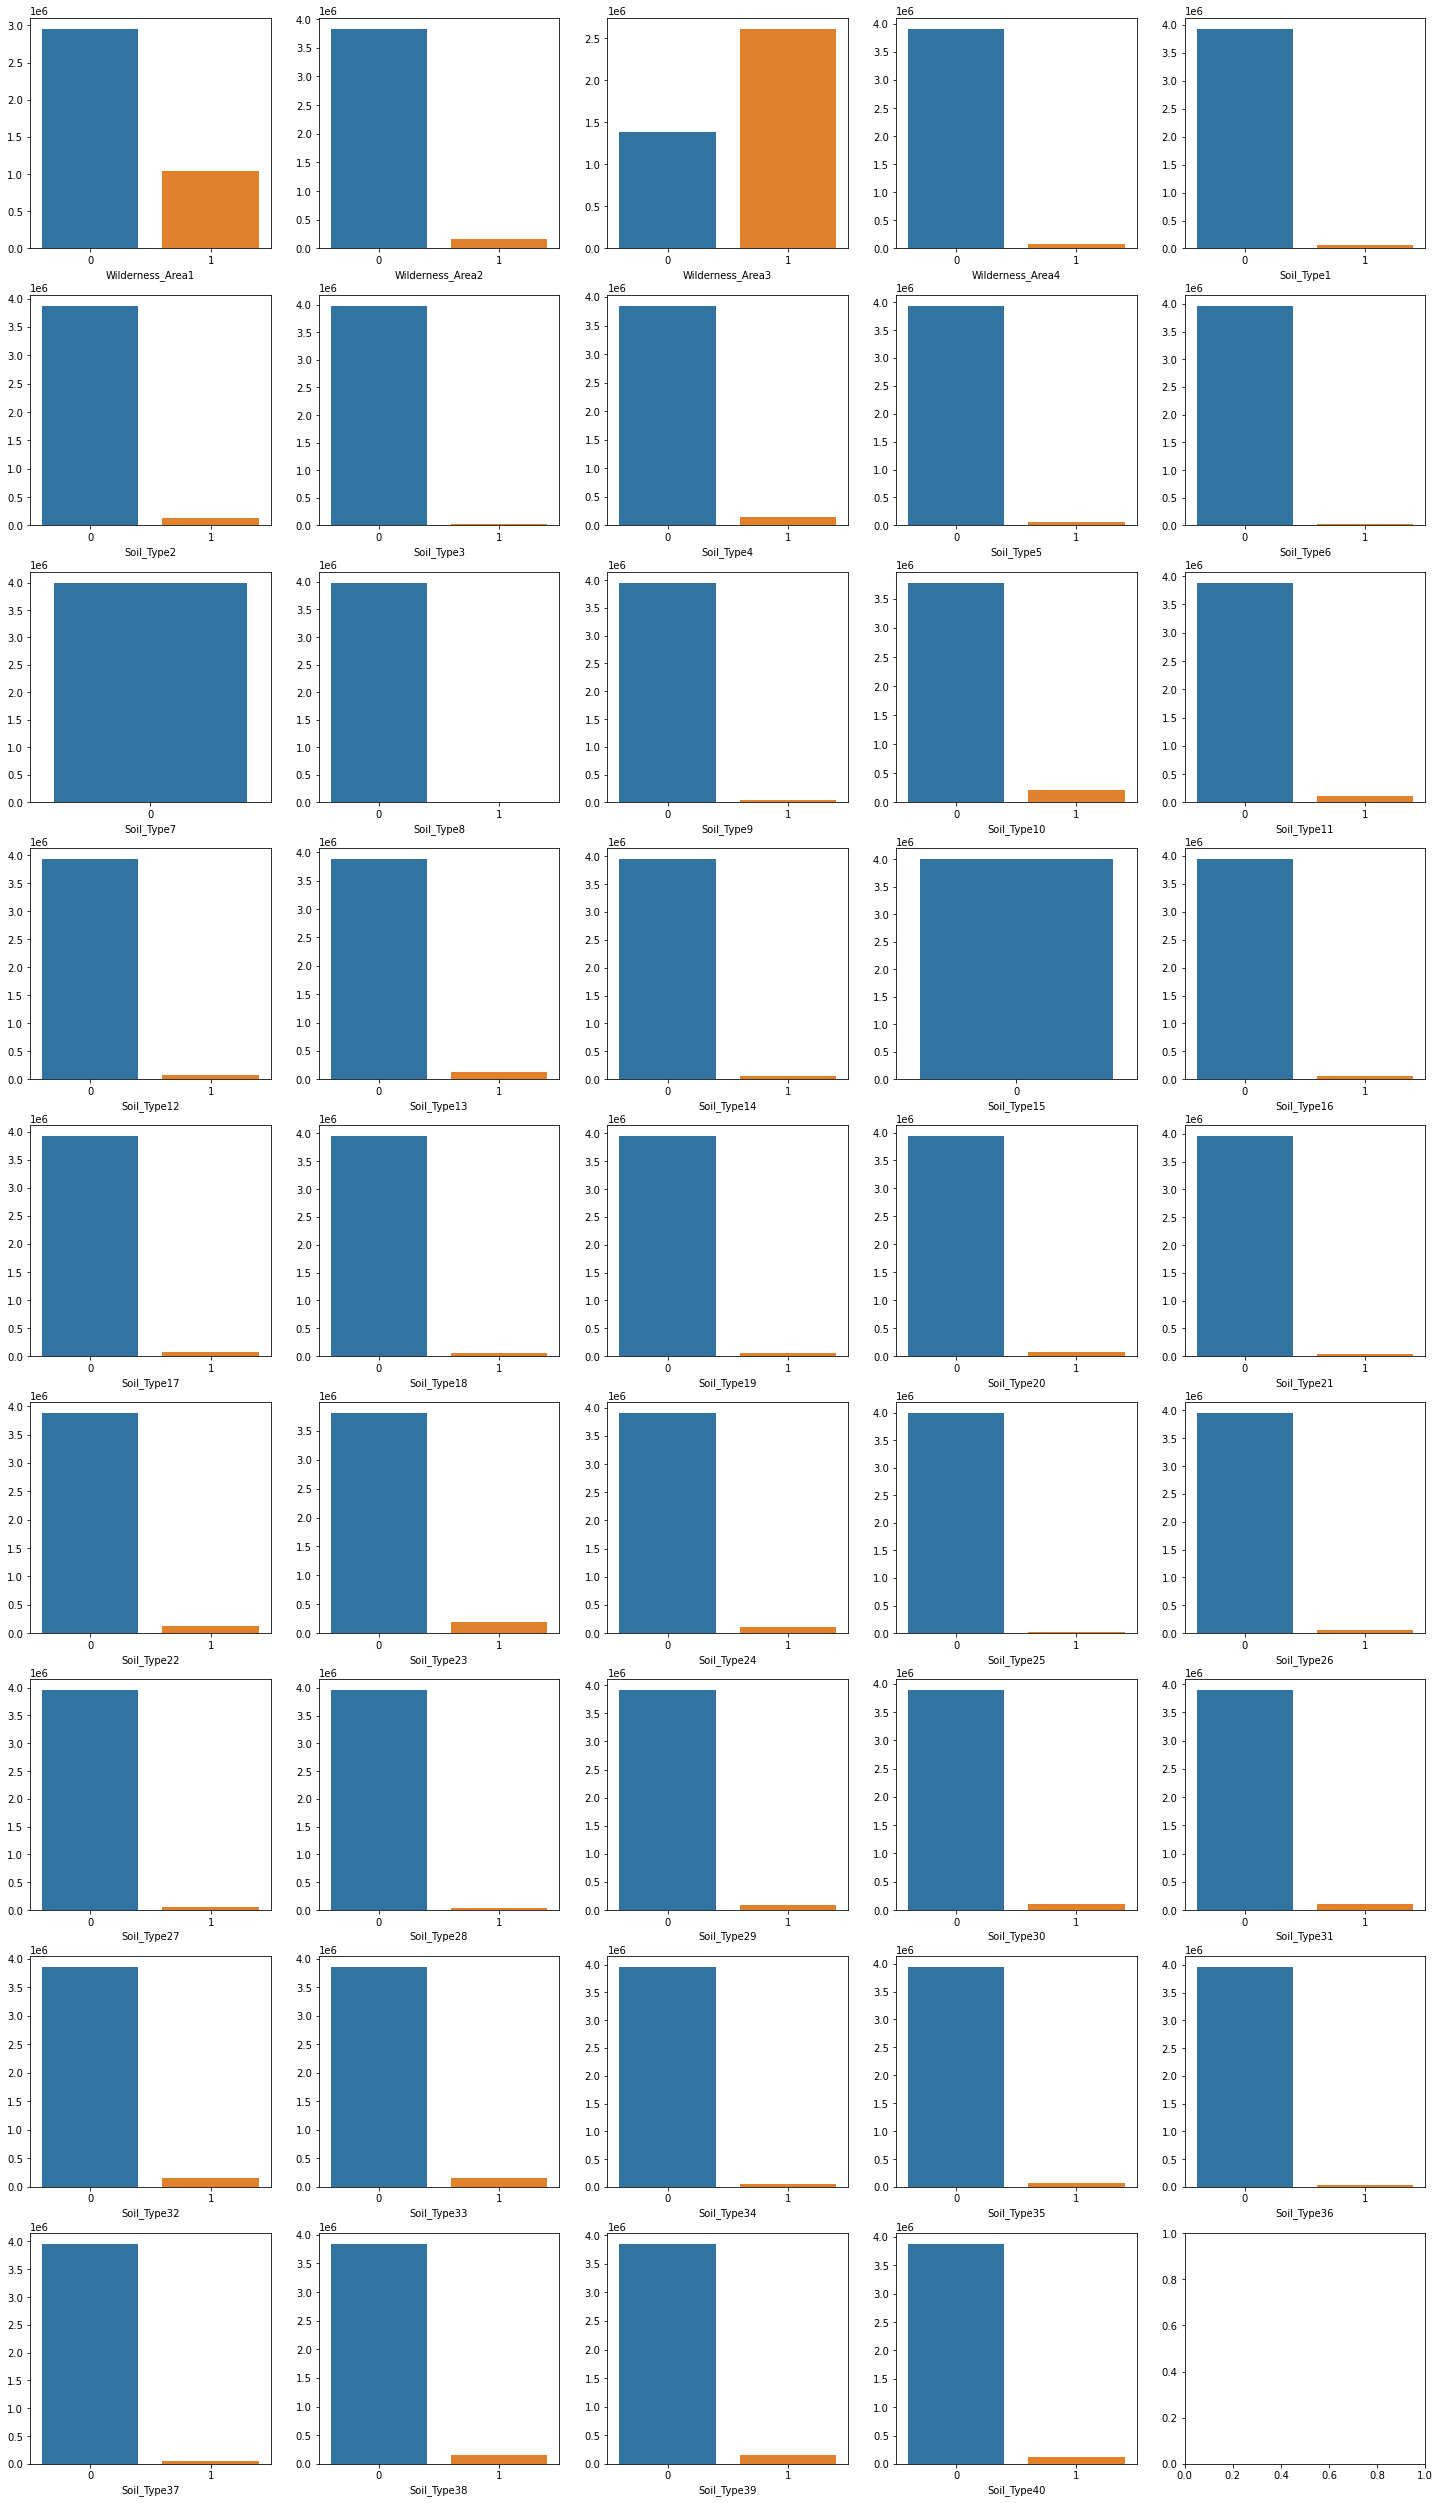

In [36]:
ncols = 5
nrows = (len(categorical_columns) - 1) // ncol + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 45))

for idx, column in tqdm(list(enumerate(categorical_columns))):
    i, j = divmod(idx, ncols)
    sns.countplot(x=df_train[column], ax=axes[i, j], label='Train data')
    sns.countplot(x=df_test[column], ax=axes[i, j], label='Test data')
    axes[i, j].set_ylabel('')

## target

/Users/g-ogaki/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

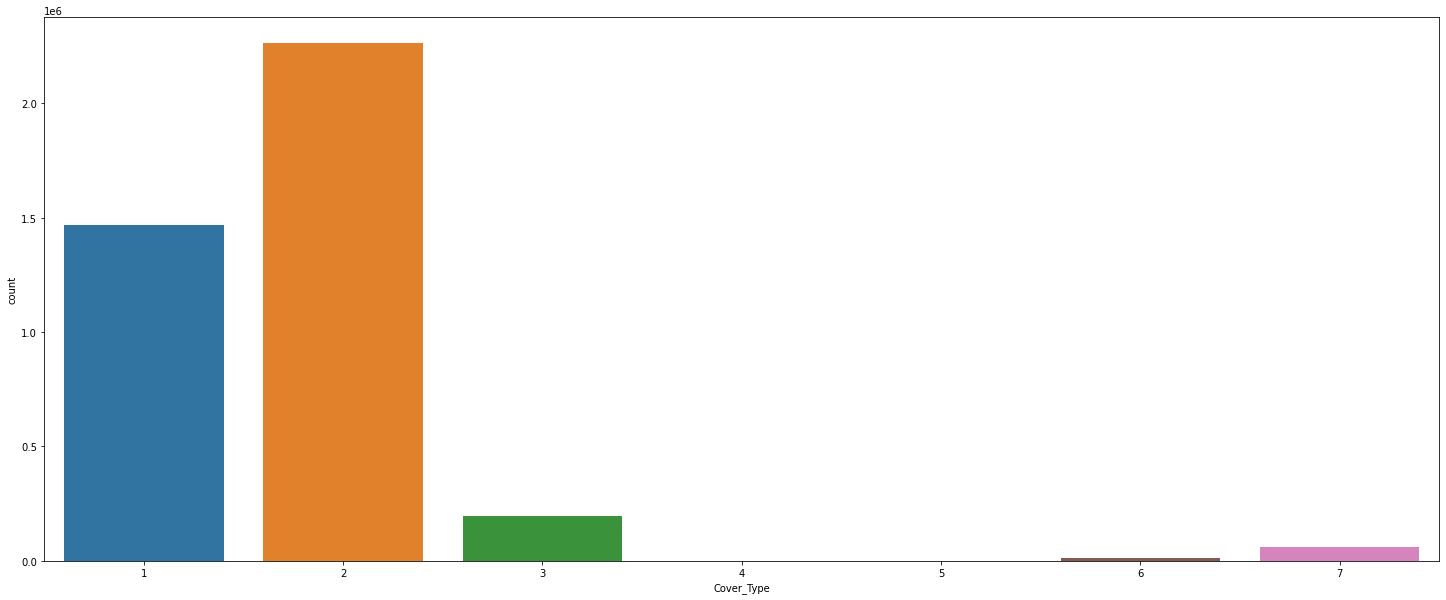

In [39]:
plt.figure(figsize=(25, 10))

sns.countplot(y_train)

In [40]:
y_train.value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

https://www.kaggle.com/sergiosaharovskiy/tps-dec-2021-a-complete-guide-eda-pytorch